In [ ]:
#EJERCICIO 1
#Escribe un trozo de código que sirva para definir un modelo en Keras para solucionar el
#siguiente problema (solo tenéis que definir el modelo pero tiene que poder compilarse la celda,
#i.e. que no de error). Muestra el resumen del modelo por pantalla.
#Tenemos un problema de clasificación de objetos donde tenemos 5000 imágenes de 28x28 en
#color. Para cada objeto tenemos una etiqueta numérica con valores de [0-19] (20 clases de
#objetos distintas).

In [9]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from time import time
import shutil
!pip install pydot
!pip install graphviz
import graphviz
import pydot

In [2]:
#Cargo los datos de MNIST, le paso un set de datos para comprobar que mi modelo funciona

#CAMBIAR EL DATA SET XQ LAS IMAGENES TIENEN QUE SER EN COLOR
#COGER IRIS QUE ES UN DATASET DE FOTOS DE FLORES
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
print(train_labels)

print(test_images.shape)
print(test_labels.shape)
print(test_labels)

(60000, 28, 28)
(60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28)
(10000,)
[7 2 1 ... 4 5 6]


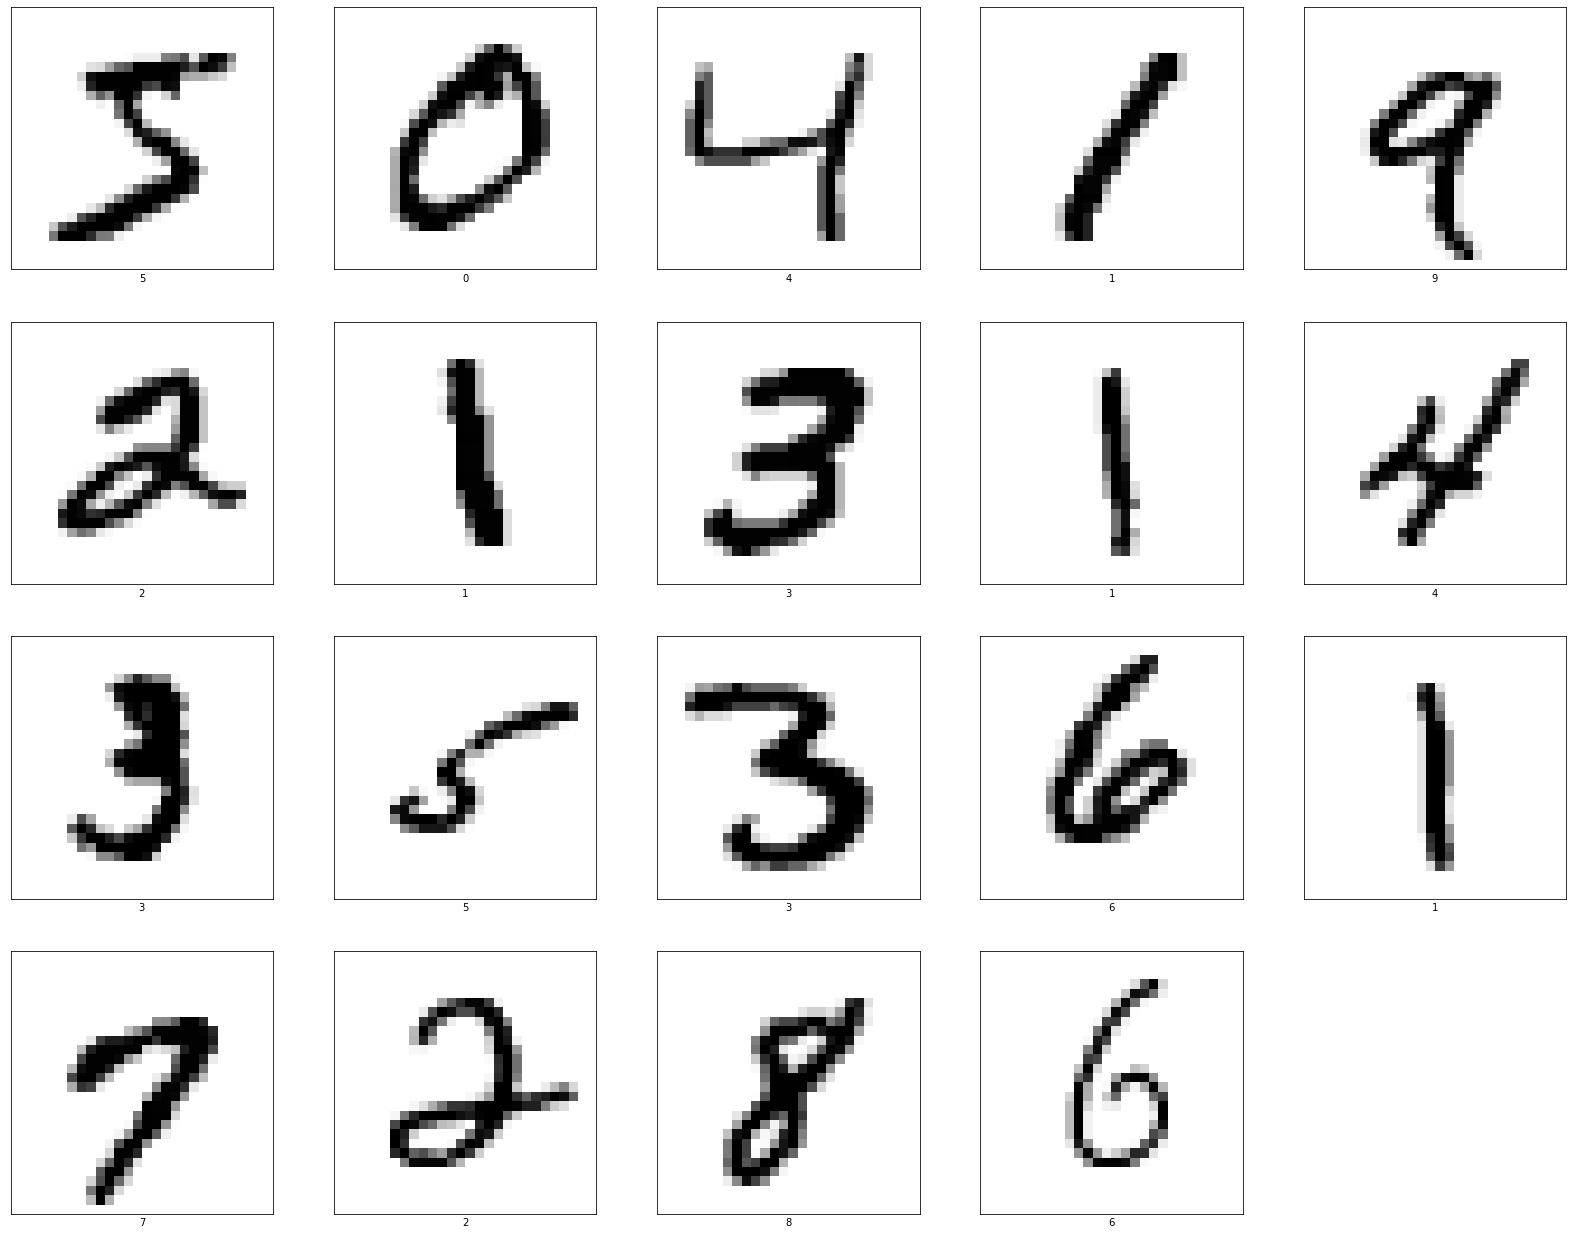

In [3]:
#Dibujo las imagenes pasandole las medidas necesarias
plt.figure(figsize=(28,28))
for i in range(19):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

In [4]:
#Normalizo todas las imagenes
mean_img = train_images.mean(axis=0)
train_images = train_images - mean_img
test_images = test_images - mean_img

In [5]:
#defino el modelo. Input_sghape es asi dado que las imagenes son 28x28 y tiene 3 canales dado que el color es la 3a dimension y en la ultima capa pongo 20 neuronas dado que hay 20 clases
#PONER UNA CAPA CONVOLUCIONAL QUE AUNQUE NO LO PONGA EN EL ENUNCIADO HABRA QUE PONERLO X SI ACASO
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28, 3), name="entrada"))
model.add(keras.layers.Dense(30, activation="sigmoid", name="oculta"))
model.add(keras.layers.Dense(20, activation="softmax", name="salida"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
entrada (Flatten)            (None, 2352)              0         
_________________________________________________________________
oculta (Dense)               (None, 30)                70590     
_________________________________________________________________
salida (Dense)               (None, 20)                620       
Total params: 71,210
Trainable params: 71,210
Non-trainable params: 0
_________________________________________________________________


In [7]:
#Compilo el modelo
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), 
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [10]:
#Resumen del modelo
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
